<a href="https://colab.research.google.com/github/Miftahul93/Machine-Learning-pemula-Dicoding/blob/main/Submission_ML_Pemula_Dicoding_Miftahul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

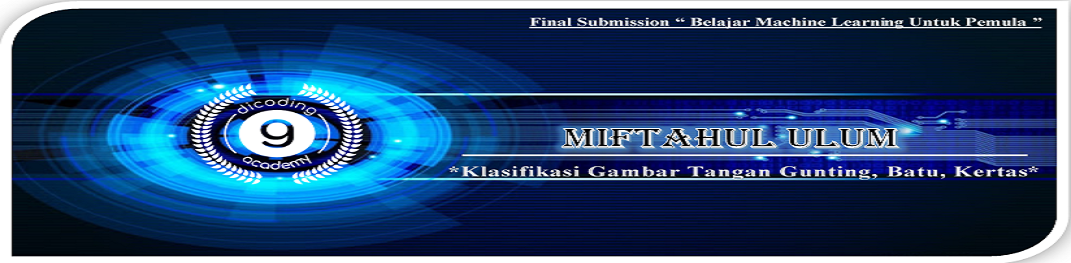

In [ ]:
# Mengunduh file Dataset kedalam Colab
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-26 23:03:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  11.0MB/s    in 32s     

2021-04-26 23:04:24 (9.68 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Mengekstrak file zip

In [ ]:
import os
import zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Menyiapkan folder untuk data gambar Batu, Kertas, Gunting 

In [ ]:
import os
folder_gunting = os.path.join('/content/rockpaperscissors/scissors')
folder_batu = os.path.join('/content/rockpaperscissors/rock')
folder_kertas = os.path.join('/content/rockpaperscissors/paper')

# Menampilkan jumlah total data gambar Batu, Kertas, Gunting
print('Jumlah total gambar Batu:', len(os.listdir(folder_batu)))
print('Jumlah total gambar Kertas:', len(os.listdir(folder_kertas)))
print('Jumlah total gambar gunting:', len(os.listdir(folder_gunting)))

Jumlah total gambar Batu: 726
Jumlah total gambar Kertas: 712
Jumlah total gambar gunting: 750


Menggunakan **Image Generator** dan mengimplementasikan **Augmentasi gambar** Serta Pemisahan data menjadi **Train Set** dan **Validation Set**

In [ ]:
# Mengimport modul yang digunakan
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
BASIS_DIR = "/content/rockpaperscissors/rps-cv-images/"
training_datagen = ImageDataGenerator(
    # Menormalisasi data
    rescale = 1./255,

    # Augmentasi
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',

    # Membagi data menjadi 60% Train Set dan 40% Validation Set
    validation_split=0.4
)

Pelebelan data menggunakan Image Data Generator berdasarkan Folder

In [ ]:
train_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode='categorical', # Kelas data untuk kategori Klasifikasi Multivariabel
    shuffle=True,
    subset='training'
)

validation_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode='categorical', # Kelas data untuk kategori Klasifikasi Multivariabel
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membagun Jaringan Saraf Tiruan dengan menggunakan model sequential

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

Melakukan Kompilasi Model

In [ ]:
# Compile model dengan 'rmsprop' dan loss function 'categorical_crossentropy' yang tidak diajarkan dikelas 
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Melatih model Jaringa Saraf Tiruan

In [ ]:
# Menambahkan fungsi Callback untuk mencapai target yang diinginkan
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('val_accuracy') > 0.96):
      print('\n PELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 96% !!!')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# Latih model dengan model .fit
history=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/100
4/4 - 4s - loss: 0.3047 - accuracy: 0.8984 - val_loss: 0.2000 - val_accuracy: 0.9375
Epoch 2/100
4/4 - 4s - loss: 0.2348 - accuracy: 0.9219 - val_loss: 0.1597 - val_accuracy: 0.9563
Epoch 3/100
4/4 - 4s - loss: 0.2140 - accuracy: 0.9219 - val_loss: 0.4218 - val_accuracy: 0.8813
Epoch 4/100
4/4 - 4s - loss: 0.1804 - accuracy: 0.9297 - val_loss: 0.2283 - val_accuracy: 0.9500
Epoch 5/100
4/4 - 4s - loss: 0.1217 - accuracy: 0.9609 - val_loss: 0.2571 - val_accuracy: 0.9125
Epoch 6/100
4/4 - 4s - loss: 0.2065 - accuracy: 0.9375 - val_loss: 0.1969 - val_accuracy: 0.9563
Epoch 7/100
4/4 - 4s - loss: 0.1653 - accuracy: 0.9531 - val_loss: 0.3386 - val_accuracy: 0.9000
Epoch 8/100
4/4 - 4s - loss: 0.2963 - accuracy: 0.9141 - val_loss: 0.4188 - val_accuracy: 0.8313
Epoch 9/100
4/4 - 4s - loss: 0.2754 - accuracy: 0.8984 - val_loss: 0.1139 - val_accuracy: 0.9750

 PELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 96% !!!


Menampilkan Ploting Akurasi Training dan Akurasi Validasi serta Ploting Loss Training dan Loss Validasi

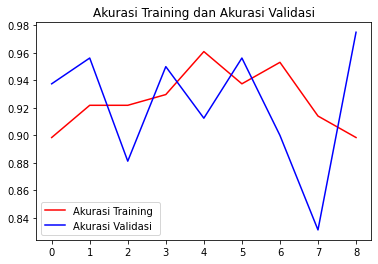

<Figure size 432x288 with 0 Axes>

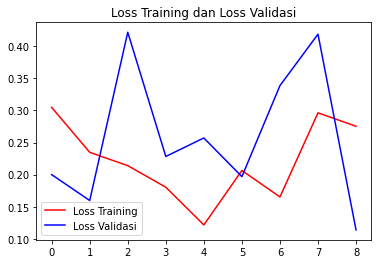

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Ploting Akurasi Training dan Akurasi Validasi
plt.plot(epochs, acc, 'r', label='Akurasi Training ')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Akurasi Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

# Ploting Loss Training dan Loss Validasi
plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Loss Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Uji Coba Model Klasifikasi Gambar Tangan Batu, Kertas, Gunting

Saving 1VRzspyXpQ6A2rKy.png to 1VRzspyXpQ6A2rKy.png
1VRzspyXpQ6A2rKy.png
Tangan ini menunjukkan bentuk GUNTING


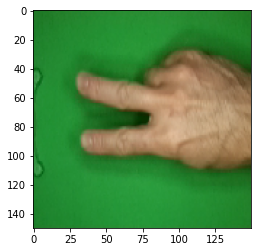

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

# Mengunggah gambar yang akan dikenali model
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan ini menunjukkan bentuk KERTAS')
  elif classes[0][1]==1:
    print('Tangan ini menunjukkan bentuk BATU')
  elif classes[0][2]==1:
    print('Tangan ini menunjukkan bentuk GUNTING')
  else:
    print('Bentuk Tangan Tidak diketahui')